Accuracy: 0.99

Confusion Matrix:
[[198008   1469]
 [   902 198858]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    199477
           1       0.99      1.00      0.99    199760

    accuracy                           0.99    399237
   macro avg       0.99      0.99      0.99    399237
weighted avg       0.99      0.99      0.99    399237



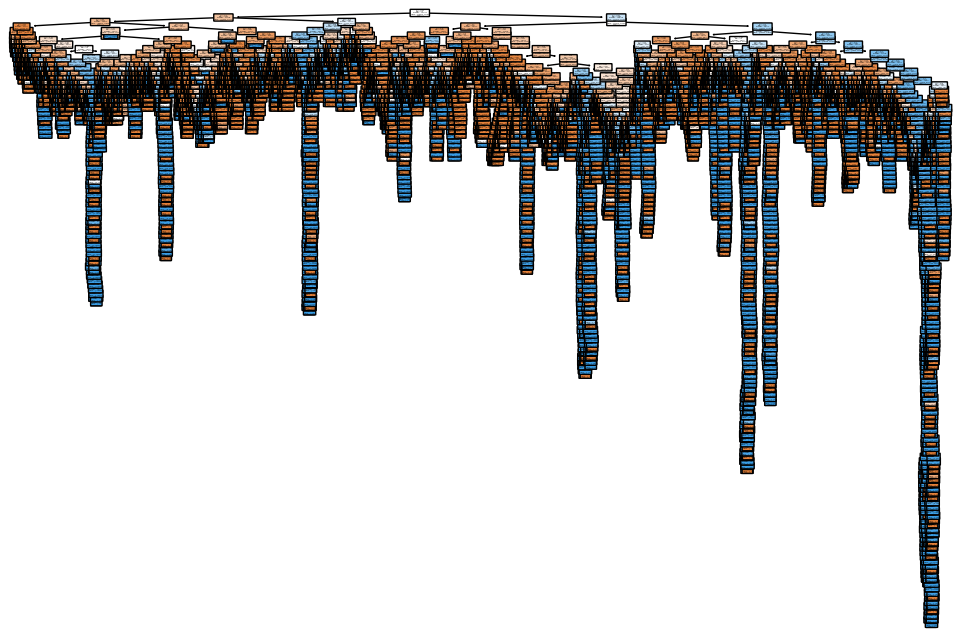

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

data = pd.read_csv('threats.csv')

X = data.drop('Threat', axis=1)
y = data['Threat']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(classifier, feature_names=X.columns, class_names=[str(label) for label in classifier.classes_], filled=True, rounded=True)
plt.show()
